# Régression linéaire simple

In [2]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [10]:
#on génère un problème de régression linéaire avec du bruit
x,y = make_regression(n_samples=200, n_features=1, noise=20)
y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


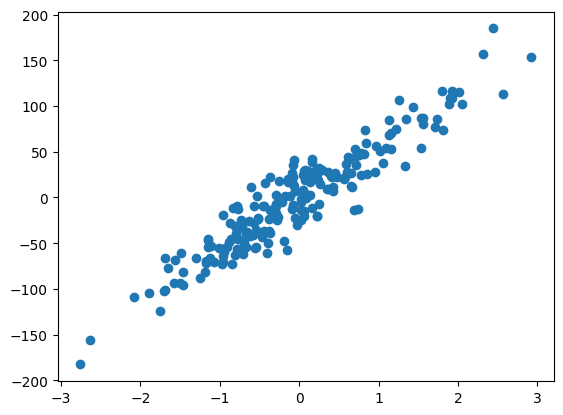

In [11]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Création du modèle

In [12]:
#on créé une matrice de contenant tous les x, et une colonne de 1 pour simplifier les calculs
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
print(X)

(200, 2)
[[-0.1891692   1.        ]
 [-1.45954632  1.        ]
 [ 2.92214337  1.        ]
 [-0.08283763  1.        ]
 [ 0.11442071  1.        ]
 [ 1.54032806  1.        ]
 [ 0.39811171  1.        ]
 [-0.77648775  1.        ]
 [-0.06940035  1.        ]
 [ 0.04417455  1.        ]
 [-1.24392088  1.        ]
 [-0.08415508  1.        ]
 [-0.27138896  1.        ]
 [ 0.48121573  1.        ]
 [-1.07836659  1.        ]
 [-0.54370698  1.        ]
 [-0.4517245   1.        ]
 [-0.90417552  1.        ]
 [ 0.13379138  1.        ]
 [-0.80537619  1.        ]
 [-0.97743431  1.        ]
 [ 0.6067123   1.        ]
 [ 2.04633907  1.        ]
 [-2.6319041   1.        ]
 [ 0.36608858  1.        ]
 [ 0.71192601  1.        ]
 [-1.75301377  1.        ]
 [-0.81210507  1.        ]
 [-0.39277357  1.        ]
 [ 1.34206159  1.        ]
 [-0.53477912  1.        ]
 [ 0.59376304  1.        ]
 [ 1.70526987  1.        ]
 [-0.29835001  1.        ]
 [ 1.13325886  1.        ]
 [-1.11156801  1.        ]
 [ 2.31698935  1.  

In [13]:
#ici, on est face à un problème de regression linéaire, où le modèle F est une fonction affine avec 2 paramètres a et b, tel que F(x) = ax + b
#on stocke dans une matrice nommée theta, les paramètres a et b
#on prend pour l'instant deux entiers a et b aléatoires pour voir comment s'en sort notre modèle
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[-0.28675964]
 [-1.1537483 ]]


In [14]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

In [15]:
#on calcule les y_predictions
y_predictions = model(X, theta)
print(y_predictions.shape)
print(y_predictions)

(200, 1)
[[-1.09950221]
 [-0.73520932]
 [-1.99170109]
 [-1.12999382]
 [-1.18655955]
 [-1.59545222]
 [-1.26791068]
 [-0.93108296]
 [-1.13384709]
 [-1.16641578]
 [-0.797042  ]
 [-1.12961602]
 [-1.0759249 ]
 [-1.29174155]
 [-0.84451629]
 [-0.99783508]
 [-1.02421195]
 [-0.89446726]
 [-1.19211427]
 [-0.92279892]
 [-0.87345959]
 [-1.3277289 ]
 [-1.74055576]
 [-0.39902443]
 [-1.25872773]
 [-1.35789995]
 [-0.65105471]
 [-0.92086935]
 [-1.0411167 ]
 [-1.5385974 ]
 [-1.00039524]
 [-1.32401558]
 [-1.64275088]
 [-1.06819356]
 [-1.47872121]
 [-0.83499546]
 [-1.81816734]
 [-1.12877415]
 [-1.27488401]
 [-0.90719647]
 [-1.37608919]
 [-1.46857647]
 [-1.60212696]
 [-1.22484286]
 [-1.13309802]
 [-1.16672801]
 [-1.73161878]
 [-1.31684574]
 [-1.03910528]
 [-0.95281689]
 [-1.07015673]
 [-0.82316854]
 [-0.98843293]
 [-1.17609906]
 [-1.1600167 ]
 [-1.38704389]
 [-1.00322724]
 [-1.1939228 ]
 [-0.88067692]
 [-0.6789461 ]
 [-0.97105611]
 [-1.13859348]
 [-1.69643617]
 [-1.51341711]
 [-1.22584056]
 [-0.96410692]
 

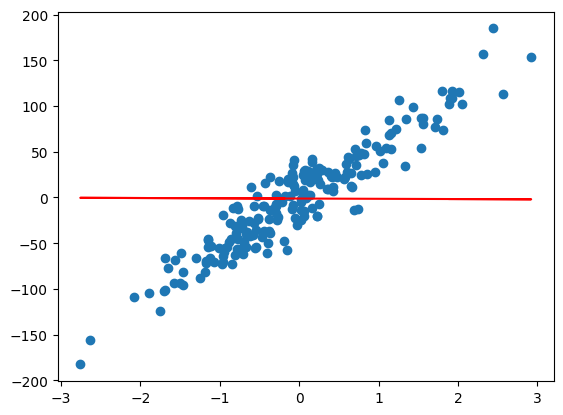

In [16]:
#on affiche notre modèle
plt.scatter(x,y)
plt.plot(x,y_predictions, c='r')

#on constate que notre modèle n'est pas très fidèle à la réalité, il faut donc optimiser les paramètres a et b pour trouver le bon modèle.


## Fonction de coûts

In [17]:
#Notre modèle n'est pas très efficace, on créé donc une fonction de coût F qui est la moyenne des erreurs quadratiques
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


In [18]:
F = cout(X, y, theta)
print(F)

1687.8765982532786


## Minimisation de la fonction de coût par la Descente de Gradient (DG)

In [19]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (np.dot(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [36]:
#on calcule les nouveaux paramètres theta
resultDescenteGradient = descenteGradient(X, y, theta, 0.01, 1000)
newTheta = resultDescenteGradient[0]
varCout = resultDescenteGradient[1]

print(newTheta.shape)
print(newTheta)
#print(varCout)

(2, 1)
[[55.0190342 ]
 [ 0.37230449]]


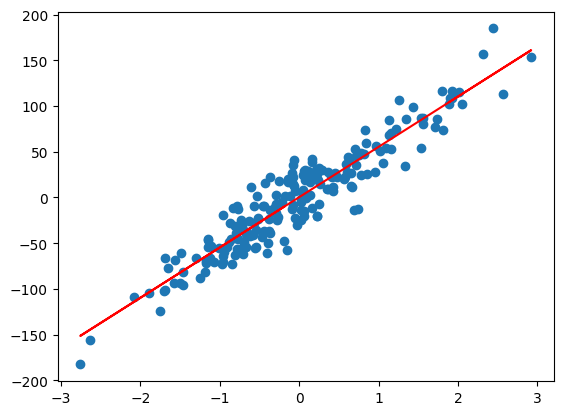

In [37]:
#on calcule de nouveaux les y_predictions avec les bon theta
y_predictions = model(X, newTheta)

plt.scatter(x, y)
plt.plot(x, y_predictions, c='red')

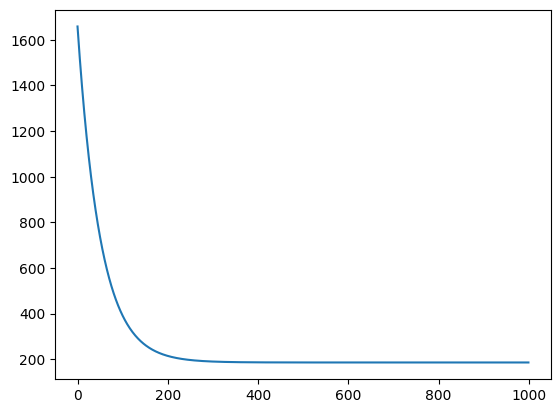

In [38]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCout)

In [39]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions = coefDet(y, y_predictions)
print(coeffPredictions)

0.8887815619109964
